#**Project Introduction**

Verbal Communication is valuable and sought after in workplace and classroom environments alike.
There is no denying the notion that Indians lack verbal communication and consequently lag behind in
the workplace or classroom environments. This happens despite them having strong technical
competencies. Clear and comprehensive speech is the vital backbone of strong communication and
presentation skills. Where some occupations consist mainly of presenting, most careers require and
thrive from the ability to communicate effectively. Research has shown that verbal communication
remains one of the most employable skills in both the perception of employers and new graduates. Of
the possible improvements to vocal presentations tone, disfluencies, and stutters, in particular, remain
one of the most common and prominent factors of someone’s demonstration. Millions of people are
affected by stuttering and other speech disfluencies, with the majority of the world having experienced
mild stutters while communicating under stressful conditions. Research shows that mild disfluencies
can be cured without medical help, just practicing speech regularly and constructive feedbacks are
effective ways to improve.
We, Data Scientists recognize this problem and say hello

#**Problem Statement**

We will solve the above-mentioned problem by applying deep learning algorithms to audio/speech
data. The solution will be to identify emotions in speech.

#**What is Speech Emotion Recognition (SER) and Why are we building this project?**

Speech Emotion Recognition, abbreviated as SER, is the act of attempting to recognize human emotion and affective states from speech. This is capitalizing on the fact that voice often reflects underlying emotion through tone and pitch. This is also the phenomenon that animals like dogs and horses employ to be able to understand human emotion.

SER is tough because emotions are subjective and annotating audio is challenging.

**Why we need it?**

1. Emotion recognition is the part of speech recognition which is gaining more popularity and need for it increases enormously. Although there are methods to recognize emotion using machine learning techniques, this project attempts to use deep learning to recognize the emotions from data.

2. SER(Speech Emotion Recognition) is used in call center for classifying calls according to emotions and can be used as the performance parameter for conversational analysis thus identifying the unsatisfied customer, customer satisfaction and so on.. for helping companies improving their services.

3. It can also be used in-car board system based on information of the mental state of the driver can be provided to the system to initiate his/her safety preventing accidents to happen.

**Datasets used in this project**

1. Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess)

This dataset includes around 1500 audio file input from 24 different actors.
12 male and 12 female where these actors record short audios in 8 different emotions i.e 1 = neutral, 2 = calm, 3 = happy, 4 = sad, 5 = angry, 6 = fearful, 7 = disgust, 8 = surprised.
Each audio file is named in such a way that the 7th character is consistent with the different emotions that they represent.


2. Surrey Audio-Visual Expressed Emotion (Savee)

This dataset contains around 500 audio files recorded by 4 different male actors. The first two characters of the file name correspond to the different emotions that the potray.

#**Importing the required libraries**

In [1]:
import os
import re

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Audio
from keras import layers
from keras import models
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import itertools

In [2]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Paths for data.
Ravdess = "/content/gdrive/MyDrive/Deep_learning_Project/ravdess-emotional-speech-audio/"
Savee = "/content/gdrive/MyDrive/Deep_learning_Project/surrey-audiovisual-expressed-emotion-savee/"

In [4]:
os.chdir('/content/gdrive/MyDrive/Deep_learning_Project')

**Ravdess dataset**

  Emotion:
  
      01 = neutral
      02 = calm
      03 = happy
      04 = sad
      05 = angry
      06 = fearful
      07 = disgust
      08 = surprised

In [5]:
ravdess_directory_list = os.listdir(Ravdess)

emotion_df = []

for dir in ravdess_directory_list:
    actor = os.listdir(os.path.join(Ravdess, dir))
    for wav in actor:
        info = wav.partition(".wav")[0].split("-")
        emotion = int(info[2])
        emotion_df.append((emotion, os.path.join(Ravdess, dir, wav)))

Ravdess_df = pd.DataFrame.from_dict(emotion_df)
Ravdess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Ravdess_df.Emotion.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotion,Path
0,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...
1,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...
2,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...
3,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...
4,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...


**Savee dataset**

The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:

    'a' = 'anger'
    'd' = 'disgust'
    'f' = 'fear'
    'h' = 'happiness'
    'n' = 'neutral'
    'sa' = 'sadness'
    'su' = 'surprise'



In [6]:
savee_directiory_list = os.listdir(Savee)

emotion_df = []

for wav in savee_directiory_list:
    info = wav.partition(".wav")[0].split("_")[1].replace(r"[0-9]", "")
    emotion = re.split(r"[0-9]", info)[0]
    if emotion=='a':
        emotion_df.append(("angry", Savee + "/" + wav))
    elif emotion=='d':
        emotion_df.append(("disgust", Savee + "/" + wav))
    elif emotion=='f':
        emotion_df.append(("fear", Savee + "/" + wav))
    elif emotion=='h':
        emotion_df.append(("happy", Savee + "/" + wav))
    elif emotion=='n':
        emotion_df.append(("neutral", Savee + "/" + wav))
    elif emotion=='sa':
        emotion_df.append(("sad", Savee + "/" + wav))
    else:
        emotion_df.append(("surprise", Savee + "/" + wav))


Savee_df = pd.DataFrame.from_dict(emotion_df)
Savee_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Savee_df.head()

,Emotion,Path
0,angry,/content/gdrive/MyDrive/Deep_learning_Project/...
1,angry,/content/gdrive/MyDrive/Deep_learning_Project/...
2,angry,/content/gdrive/MyDrive/Deep_learning_Project/...
3,angry,/content/gdrive/MyDrive/Deep_learning_Project/...
4,angry,/content/gdrive/MyDrive/Deep_learning_Project/...


In [7]:
# creating Dataframe using all the 2 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.shape

(1922, 2)

In [8]:
data_path.head(10)

,Emotion,Path
0,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...
1,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...
2,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...
3,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...
4,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...
5,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...
6,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...
7,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...
8,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...
9,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...


#**Data Visualisation and Exploration**
First let's plot the count of each emotions in our dataset.

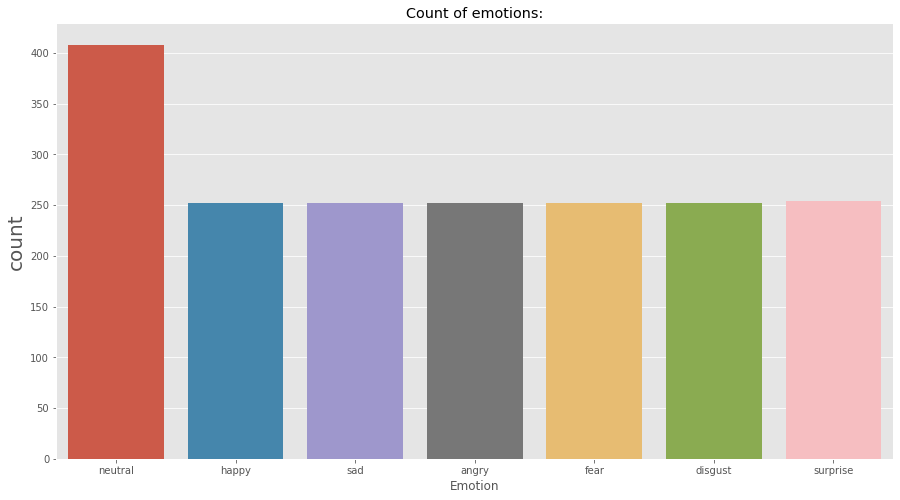

In [9]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)
plt.style.use("ggplot")
plt.ylabel('Count', size=20)
plt.title("Count of emotions:")
sns.countplot(x=data_path["Emotion"])
sns.despine(top=True, right=True, left=False, bottom=False)

#**We can also plot waveplots and spectograms for audio signals.**


*   Waveplots - Waveplots let us know the loudness of the audio at a given time.
*   Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.





In [10]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

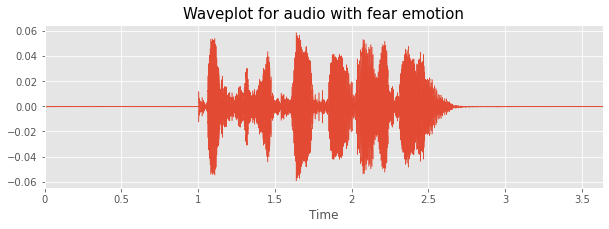

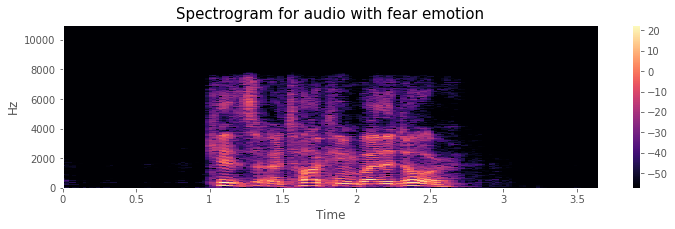

In [11]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

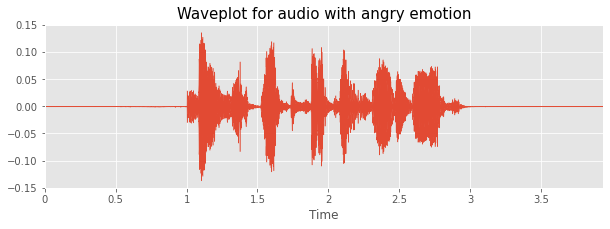

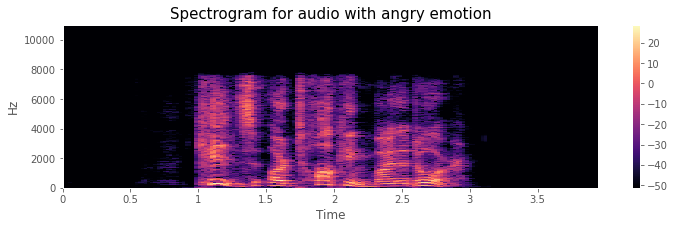

In [12]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

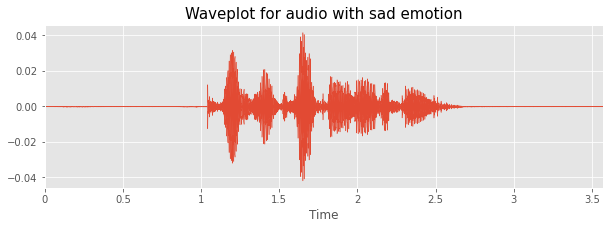

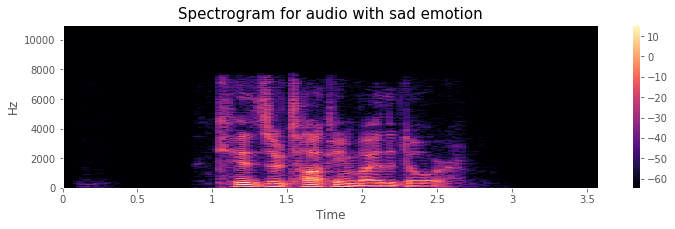

In [13]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

#**Data Augmentation**


Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.

**We have some ways for data augmentation in sound data:**

*   Noise injection

*   Stretching

*   Shifting

*   Pitching


In [14]:
def noise(data, random=False, rate=0.035, threshold=0.075):
    """Add some noise to sound sample. Use random if you want to add random noise with some threshold.
    Or use rate Random=False and rate for always adding fixed noise."""
    if random:
        rate = np.random.random() * threshold
    noise_amp = rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    """Stretching data with some rate."""
    return librosa.effects.time_stretch(data, rate)

def shift(data, rate=1000):
    """Shifting data with some rate"""
    shift_range = int(np.random.uniform(low=-5, high = 5)*rate)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7, random=False):
    """"Add some pitch to sound sample. Use random if you want to add random pitch with some threshold.
    Or use pitch_factor Random=False and rate for always adding fixed pitch."""
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [15]:
data_path.head()

,Emotion,Path
0,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...
1,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...
2,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...
3,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...
4,neutral,/content/gdrive/MyDrive/Deep_learning_Project/...


In [16]:
path = data_path[data_path["Emotion"] == "happy"]["Path"].iloc[0]
data, sampling_rate = librosa.load(path)

**1. Simple Audio**

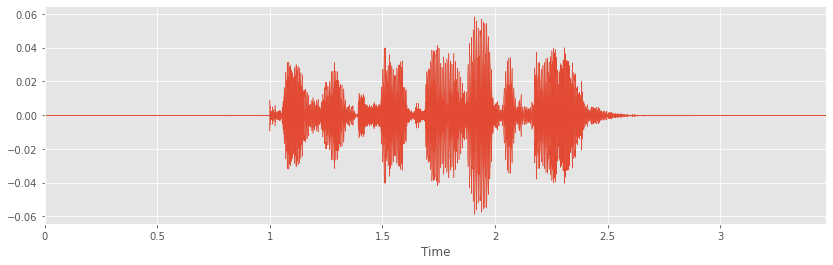

In [17]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(data, sampling_rate)
Audio(path)

**2. Noise Injection**

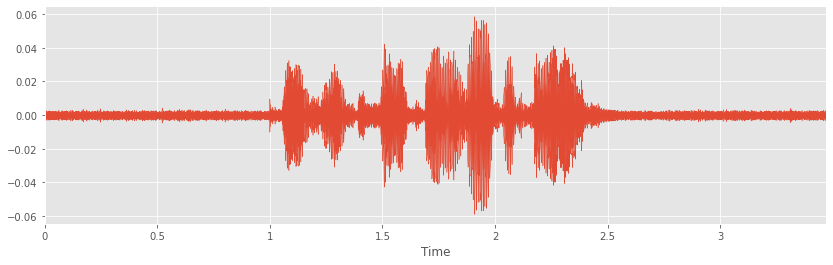

In [18]:
noised_data = noise(data, random=True)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=noised_data, sr=sampling_rate)
Audio(noised_data, rate=sampling_rate)

**3. Stretching**

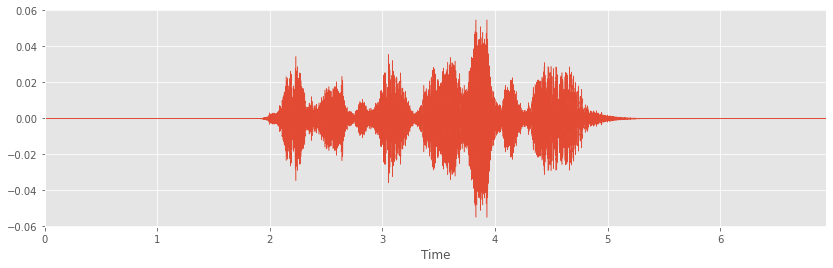

In [19]:
stretched_data = stretch(data, rate=0.5)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=stretched_data, sr=sampling_rate)
Audio(stretched_data, rate=sampling_rate)

**4. Shifting**

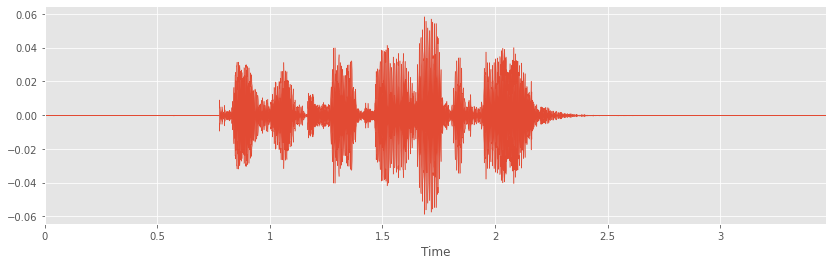

In [20]:
shifted_data = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=shifted_data, sr=sampling_rate)
Audio(shifted_data, rate=sampling_rate)

**5. Pitch**

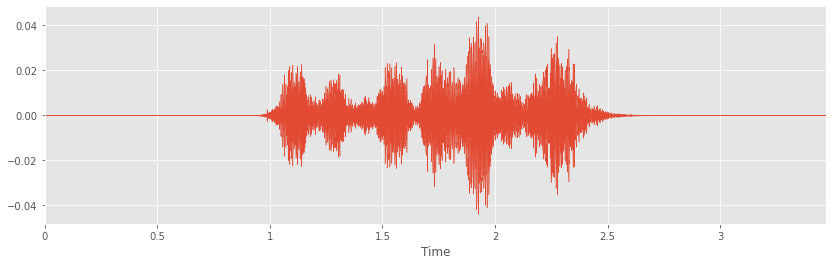

In [21]:
pitched_data = pitch(data, sampling_rate, pitch_factor=0.5, random=True)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=pitched_data, sr=sampling_rate)
Audio(pitched_data, rate=sampling_rate)

#**Feature Extraction**

Extraction of features is a very important part in analyzing and finding relations between different things.

As we already know that the data provided of audio cannot be understood by the models directly so we need to convert them into an understandable format for which feature extraction is used.

**There are some features may be useful:**

          Zero Crossing Rate : The rate of sign-changes of the signal during the duration of a particular frame.

          Energy : The sum of squares of the signal values, normalized by the respective frame length.

          Entropy of Energy :The entropy of sub-frames’ normalized energies. It can be interpreted as a measure of abrupt changes.

          Spectral Centroid : The center of gravity of the spectrum.

          Spectral Spread : The second central moment of the spectrum.

          Spectral Entropy : Entropy of the normalized spectral energies for a set of sub-frames.

          Spectral Flux : The squared difference between the normalized magnitudes of the spectra of the two successive frames.

          Spectral Rolloff : The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.

          MFCCs : Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.

In [22]:
def chunks(data, frame_length, hop_length):
    for i in range(0, len(data), hop_length):
        yield data[i:i+frame_length]

# Zero Crossing Rate
def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)


def energy(data, frame_length=2048, hop_length=512):
    en = np.array([np.sum(np.power(np.abs(data[hop:hop+frame_length]), 2)) for hop in range(0, data.shape[0], hop_length)])
    return en / frame_length


def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)


def entropy_of_energy(data, frame_length=2048, hop_length=512):
    energies = energy(data, frame_length, hop_length)
    energies /= np.sum(energies)

    entropy = 0.0
    entropy -= energies * np.log2(energies)
    return entropy


def spc(data, sr, frame_length=2048, hop_length=512):
    spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(spectral_centroid)


def spc_flux(data):
    isSpectrum = data.ndim == 1
    if isSpectrum:
        data = np.expand_dims(data, axis=1)

    X = np.c_[data[:, 0], data]
    af_Delta_X = np.diff(X, 1, axis=1)
    vsf = np.sqrt((np.power(af_Delta_X, 2).sum(axis=0))) / X.shape[0]

    return np.squeeze(vsf) if isSpectrum else vsf


def spc_rollof(data, sr, frame_length=2048, hop_length=512):
    spcrollof = librosa.feature.spectral_rolloff(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(spcrollof)


def chroma_stft(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    stft = np.abs(librosa.stft(data))
    chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sr)
    return np.squeeze(chroma_stft.T) if not flatten else np.ravel(chroma_stft.T)


def mel_spc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mel = librosa.feature.melspectrogram(y=data, sr=sr)
    return np.squeeze(mel.T) if not flatten else np.ravel(mel.T)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

**Let's check data formats:**

In [23]:
path = np.array(data_path["Path"])[658]
data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
len(data)

54458

In [24]:
print("ZCR: ", zcr(data).shape)
print("Energy: ", energy(data).shape)
print("Entropy of Energy :", entropy_of_energy(data).shape)
print("RMS :", rmse(data).shape)
print("Spectral Centroid :", spc(data, sampling_rate).shape)
print("Spectral Flux: ", spc_flux(data).shape)
print("Spectral Rollof: ", spc_rollof(data, sampling_rate).shape)
print("Chroma STFT: ", chroma_stft(data, sampling_rate).shape)
print("MelSpectrogram: ", mel_spc(data, sampling_rate).shape)
print("MFCC: ", mfcc(data, sampling_rate).shape)

ZCR:  (107,)
Energy:  (107,)
Entropy of Energy : (107,)
RMS : (107,)
Spectral Centroid : (107,)
Spectral Flux:  ()
Spectral Rollof:  (107,)
Chroma STFT:  (1284,)
MelSpectrogram:  (13696,)
MFCC:  (2140,)


**In experimental way was decided to use just 3 main features for this task: ZCR, RMS and MFCC.**

**Also in experimental way was decided to use just 2.5s duration with 0.6 offset - in the dataset first 0.6s contains no information about emotion, and most of them are less then 3s.**

In [25]:
def extract_features(data, sr, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        # np.mean(energy(data, frame_length, hop_length),axis=0),
                        # np.mean(entropy_of_energy(data, frame_length, hop_length), axis=0),
                        rmse(data, frame_length, hop_length),
                        # spc(data, sr, frame_length, hop_length),
                        # spc_entropy(data, sr),
                        # spc_flux(data),
                        # spc_rollof(data, sr, frame_length, hop_length),
                        # chroma_stft(data, sr, frame_length, hop_length),
                        # mel_spc(data, sr, frame_length, hop_length, flatten=True)
                        mfcc(data, sr, frame_length, hop_length)
                                    ))
    return result

In [26]:
def get_features(path, duration=2.5, offset=0.6):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=duration, offset=offset)

     # without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data, random=True)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2)) # stacking vertically

    # data with pitching
    pitched_data = pitch(data, sample_rate, random=True)
    res3 = extract_features(pitched_data, sample_rate)
    result = np.vstack((result, res3)) # stacking vertically

    # data with pitching and white_noise
    new_data = pitch(data, sample_rate, random=True)
    data_noise_pitch = noise(new_data, random=True)
    res3 = extract_features(data_noise_pitch, sample_rate)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [27]:
X, Y = [], []
print("Feature processing...")
for path, emotion, ind in zip(data_path.Path, data_path.Emotion, range(data_path.Path.shape[0])):
    features = get_features(path)
    if ind % 100 == 0:
        print(f"{ind} samples has been processed...")
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
print("Done.")

Feature processing...
0 samples has been processed...
100 samples has been processed...
200 samples has been processed...
300 samples has been processed...
400 samples has been processed...
500 samples has been processed...
600 samples has been processed...
700 samples has been processed...
800 samples has been processed...
900 samples has been processed...
1000 samples has been processed...
1100 samples has been processed...
1200 samples has been processed...
1300 samples has been processed...
1400 samples has been processed...
1500 samples has been processed...
1600 samples has been processed...
1700 samples has been processed...
1800 samples has been processed...
1900 samples has been processed...
Done.


**Let's save our features as DataFrame for further processing:**

In [28]:
features_path = "features.csv"

In [29]:
extracted_df = pd.DataFrame(X)
extracted_df["labels"] = Y
extracted_df.to_csv(features_path, index=False)
extracted_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355,2356,2357,2358,2359,2360,2361,2362,2363,2364,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,labels
0,0.038086,0.112305,0.112305,0.259277,0.338379,0.403809,0.562500,0.562500,0.577637,0.555664,0.397461,0.259277,0.279785,0.306641,0.453125,0.564941,0.468750,0.338867,0.203613,0.100098,0.058594,0.063965,0.068848,0.065918,0.061523,0.050293,0.044922,0.074707,0.132812,0.189941,0.205566,0.169922,0.130371,0.161621,0.245117,0.350586,0.423828,0.366211,0.265137,0.162109,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-857.979309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
1,0.251465,0.375488,0.506348,0.500977,0.506836,0.502930,0.487305,0.492188,0.488281,0.500000,0.517090,0.512695,0.515625,0.508301,0.506348,0.493164,0.451660,0.341797,0.223633,0.129883,0.059570,0.063965,0.068848,0.065918,0.061523,0.051270,0.049805,0.078613,0.138672,0.196777,0.209473,0.175781,0.135254,0.162598,0.245117,0.349609,0.420898,0.364258,0.263184,0.160156,...,-3.503787,-4.891362,-7.550555,-0.926901,0.112764,1.531378,3.735534,1.363483,-2.610293,-1.936882,-3.315655,-1.654344,-2.614595,-0.944633,-1.662421,-2.041593,-0.740467,-0.116436,2.591336,-631.052585,0.262451,0.810098,-3.544079,-1.287333,-0.220331,1.573683,5.399745,5.689699,0.643074,-3.324911,-1.286409,-0.164851,-0.034600,0.451839,-0.845341,-2.589726,-0.544181,0.133976,1.547356,neutral
2,0.207031,0.317871,0.417969,0.392578,0.372559,0.330566,0.333496,0.351074,0.340332,0.359863,0.334961,0.308105,0.298828,0.259766,0.216797,0.171387,0.127930,0.094238,0.077148,0.077148,0.077148,0.082031,0.077148,0.071289,0.060059,0.047852,0.067383,0.134766,0.200195,0.221191,0.208496,0.153320,0.174316,0.253906,0.347168,0.430664,0.421875,0.347168,0.245605,0.145996,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-881.868164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
3,0.248535,0.375000,0.502441,0.500000,0.508789,0.513184,0.515137,0.519043,0.520020,0.517578,0.495117,0.489258,0.473633,0.472168,0.486816,0.481934,0.421875,0.315918,0.215332,0.120605,0.087891,0.087891,0.085938,0.080566,0.084473,0.104004,0.143555,0.213379,0.268555,0.276855,0.257324,0.203613,0.211426,0.269043,0.344727,0.425781,0.406738,0.313965,0.229980,0.135742,...,-6.815604,0.207713,-0.492337,-6.500790,-3.624991,2.595457,3.905829,0.970263,2.675552,3.903134,-0.940812,1.955951,3.276549,4.629336,0.207300,0.799971,7.246738,5.767124,1.777294,-465.806049,-5.934692,-0.526063,-2.270270,-5.107158,-6.851236,2.518455,3.767190,0.710366,5.283729,1.751023,-2.222766,0.907200,4.825292,3.975298,0.720927,-0.704352,6.302238,1.302631,-1.738210,neutral
4,0.083496,0.216309,0.375000,0.417969,0.361328,0.367188,0.354004,0.435547,0.546875,0.507812,0.451172,0.425781,0.396484,0.451172,0.486328,0.498535,0.472168,0.391113,0.337402,0.235840,0.162109,0.097168,0.033203,0.033691,0.057129,0.133301,0.150879,0.153809,0.135254,0.068359,0.053223,0.047852,0.119629,0.159668,0.181641,0.180176,0.113281,0.068848,0.054688,0.064453,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-859.706543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [30]:
extracted_df = pd.read_csv(features_path)
print(extracted_df.shape)

(7688, 2377)


In [31]:
# Fill NaN with 0
extracted_df = extracted_df.fillna(0)
print(extracted_df.isna().any())
extracted_df.shape

0         False
1         False
2         False
3         False
4         False
          ...  
2372      False
2373      False
2374      False
2375      False
labels    False
Length: 2377, dtype: bool


(7688, 2377)

In [32]:
extracted_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355,2356,2357,2358,2359,2360,2361,2362,2363,2364,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,labels
0,0.038086,0.112305,0.112305,0.259277,0.338379,0.403809,0.562500,0.562500,0.577637,0.555664,0.397461,0.259277,0.279785,0.306641,0.453125,0.564941,0.468750,0.338867,0.203613,0.100098,0.058594,0.063965,0.068848,0.065918,0.061523,0.050293,0.044922,0.074707,0.132812,0.189941,0.205566,0.169922,0.130371,0.161621,0.245117,0.350586,0.423828,0.366211,0.265137,0.162109,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-857.979309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
1,0.251465,0.375488,0.506348,0.500977,0.506836,0.502930,0.487305,0.492188,0.488281,0.500000,0.517090,0.512695,0.515625,0.508301,0.506348,0.493164,0.451660,0.341797,0.223633,0.129883,0.059570,0.063965,0.068848,0.065918,0.061523,0.051270,0.049805,0.078613,0.138672,0.196777,0.209473,0.175781,0.135254,0.162598,0.245117,0.349609,0.420898,0.364258,0.263184,0.160156,...,-3.503787,-4.891362,-7.550555,-0.926901,0.112764,1.531378,3.735534,1.363483,-2.610293,-1.936882,-3.315655,-1.654344,-2.614595,-0.944633,-1.662421,-2.041593,-0.740467,-0.116436,2.591336,-631.052585,0.262451,0.810098,-3.544079,-1.287333,-0.220331,1.573683,5.399745,5.689699,0.643074,-3.324911,-1.286409,-0.164851,-0.034600,0.451839,-0.845341,-2.589726,-0.544181,0.133976,1.547356,neutral
2,0.207031,0.317871,0.417969,0.392578,0.372559,0.330566,0.333496,0.351074,0.340332,0.359863,0.334961,0.308105,0.298828,0.259766,0.216797,0.171387,0.127930,0.094238,0.077148,0.077148,0.077148,0.082031,0.077148,0.071289,0.060059,0.047852,0.067383,0.134766,0.200195,0.221191,0.208496,0.153320,0.174316,0.253906,0.347168,0.430664,0.421875,0.347168,0.245605,0.145996,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-881.868164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
3,0.248535,0.375000,0.502441,0.500000,0.508789,0.513184,0.515137,0.519043,0.520020,0.517578,0.495117,0.489258,0.473633,0.472168,0.486816,0.481934,0.421875,0.315918,0.215332,0.120605,0.087891,0.087891,0.085938,0.080566,0.084473,0.104004,0.143555,0.213379,0.268555,0.276855,0.257324,0.203613,0.211426,0.269043,0.344727,0.425781,0.406738,0.313965,0.229980,0.135742,...,-6.815604,0.207713,-0.492337,-6.500790,-3.624991,2.595457,3.905829,0.970263,2.675552,3.903134,-0.940812,1.955951,3.276549,4.629336,0.207300,0.799971,7.246738,5.767124,1.777294,-465.806049,-5.934692,-0.526063,-2.270270,-5.107158,-6.851236,2.518455,3.767190,0.710366,5.283729,1.751023,-2.222766,0.907200,4.825292,3.975298,0.720927,-0.704352,6.302238,1.302631,-1.738210,neutral
4,0.083496,0.216309,0.375000,0.417969,0.361328,0.367188,0.354004,0.435547,0.546875,0.507812,0.451172,0.425781,0.396484,0.451172,0.486328,0.498535,0.472168,0.391113,0.337402,0.235840,0.162109,0.097168,0.033203,0.033691,0.057129,0.133301,0.150879,0.153809,0.135254,0.068359,0.053223,0.047852,0.119629,0.159668,0.181641,0.180176,0.113281,0.068848,0.054688,0.064453,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-859.706543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


#**Data Preparation**
As of now we have extracted the data, now we need to normalize and split our data for training and testing.

In [33]:
X = extracted_df.drop(labels="labels", axis=1)
Y = extracted_df["labels"]

In [34]:
lb = LabelEncoder()
Y = np_utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6150, 2376), (1538, 2376), (6150, 7), (1538, 7))

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1, shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((5535, 2376), (1538, 2376), (615, 2376), (5535, 7), (1538, 7), (615, 7))

In [37]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((5535, 2376), (1538, 2376), (615, 2376), (5535, 7), (1538, 7), (615, 7))

In [38]:
#We have to use 1-dimensional CNN which need specifical shape:
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(5535, 2376, 1)

**Let's define our model:**

In [72]:
earlystopping = EarlyStopping(monitor ="val_acc",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)

In [73]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [74]:
# checkpointer = ModelCheckpoint(filepath = 'finalmodel.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='min')

In [75]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [76]:
model = models.Sequential()
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(X_train.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(7, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["acc"])

In [77]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 2376, 512)         3072      
_________________________________________________________________
batch_normalization_24 (Batc (None, 2376, 512)         2048      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 1188, 512)         0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 1188, 512)         1311232   
_________________________________________________________________
batch_normalization_25 (Batc (None, 1188, 512)         2048      
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 594, 512)          0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 594, 256)         

In [78]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=50, batch_size=64,
                    callbacks=[earlystopping, learning_rate_reduction])

Epoch 1/50
87/87 [==============================] - 59s 643ms/step - loss: 1.8915 - acc: 0.3850 - val_loss: 3.1776 - val_acc: 0.2114
Epoch 2/50
87/87 [==============================] - 55s 635ms/step - loss: 1.2664 - acc: 0.5431 - val_loss: 3.2737 - val_acc: 0.2163
Epoch 3/50
87/87 [==============================] - 55s 634ms/step - loss: 0.8703 - acc: 0.7106 - val_loss: 3.2576 - val_acc: 0.1870
Epoch 4/50
87/87 [==============================] - 55s 632ms/step - loss: 0.5544 - acc: 0.8266 - val_loss: 3.2635 - val_acc: 0.2049
Epoch 5/50
87/87 [==============================] - 55s 631ms/step - loss: 0.3612 - acc: 0.9008 - val_loss: 2.1396 - val_acc: 0.3984
Epoch 6/50
87/87 [==============================] - 55s 631ms/step - loss: 0.2508 - acc: 0.9395 - val_loss: 1.2671 - val_acc: 0.6081
Epoch 7/50
87/87 [==============================] - 55s 632ms/step - loss: 0.1982 - acc: 0.9534 - val_loss: 0.7770 - val_acc: 0.7545
Epoch 8/50
87/87 [==============================] - 55s 631ms/step - 

49/49 [==============================] - 6s 112ms/step - loss: 0.3329 - acc: 0.9252
Accuracy of our model on test data :  92.52275824546814 %


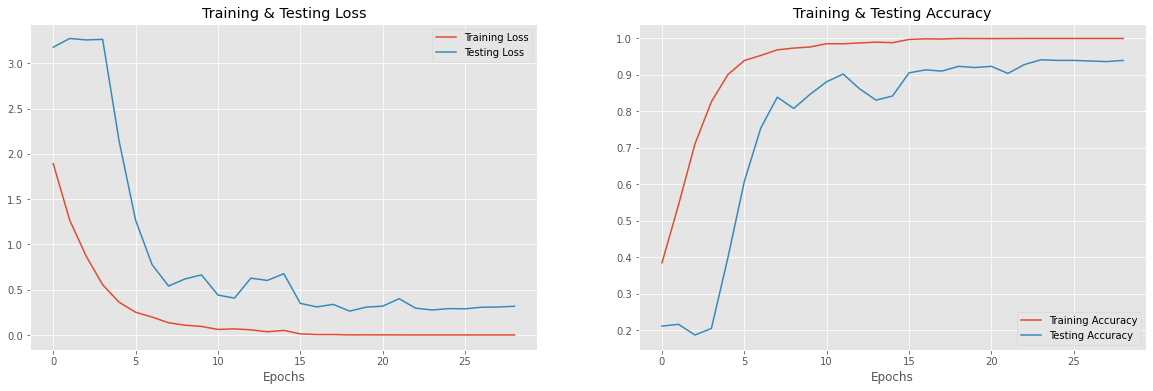

In [79]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
test_acc = history.history['val_acc']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(train_loss, label = 'Training Loss')
ax[0].plot(test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(train_acc, label = 'Training Accuracy')
ax[1].plot(test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [80]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([6, 4, 0, ..., 4, 5, 5])

In [81]:
y_check = np.argmax(y_test, axis=1)
y_check

array([6, 4, 0, ..., 4, 5, 5])

In [82]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_check, y_pred=y_pred)

In [83]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[195   1   7   7   0   1   1]
 [  2 183   4   4  11   3   0]
 [  0   1 180   4   2   4   4]
 [  4   1   2 186   6   1   0]
 [  0   2   5   3 309   7   1]
 [  0   1   2   4   6 177   2]
 [  0   1   3   5   0   3 193]]


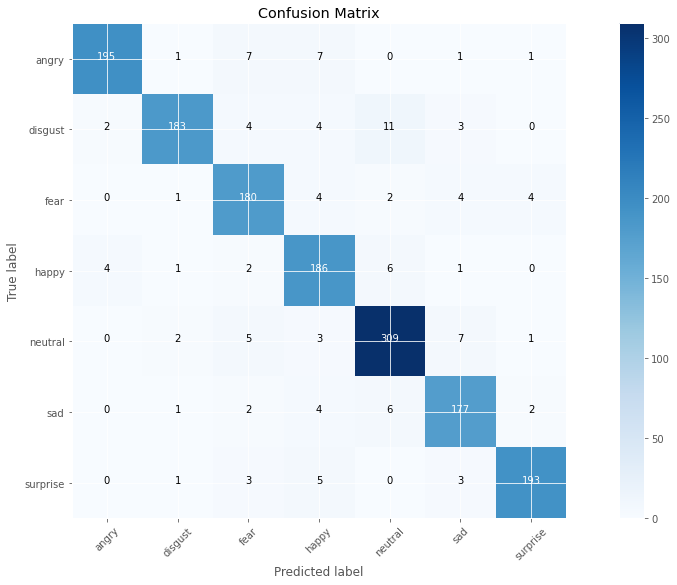

In [84]:
cm_plot_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [85]:
path_to_model = "finalmodel.hdf5"

model.save(path_to_model)